# 1. Exploratory Data Analysis (EDA)

## 1.1 Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Load training data
df = pd.read_csv('../data/raw/data.csv')

print(f"Dataset shape: {df.shape}")
print(f"Number of samples: {len(df):,}")
print(f"Number of features: {df.shape[1] - 2} (excluding index and target)")
df.head()

Dataset shape: (100000, 19)
Number of samples: 100,000
Number of features: 17 (excluding index and target)


,index,kitchen_area,bath_area,other_area,gas,hot_water,central_heating,extra_area,extra_area_count,year,ceil_height,floor_max,floor,total_area,bath_count,extra_area_type_name,district_name,rooms_count,price
0,0,9,18,15.757559,No,No,Yes,17,1,1957,3.12,3,3,48.424226,2,balcony,Vyborgskij,0,9652263
1,1,11,22,19.919845,Yes,No,Yes,6,1,1906,2.50,2,1,54.919845,2,balcony,Vyborgskij,1,11017818
2,2,24,24,11.165478,Yes,Yes,Yes,6,1,1958,3.11,4,3,61.165478,2,loggia,Vyborgskij,1,13018374
3,3,23,36,31.310915,No,Yes,Yes,20,0,2004,3.69,9,1,96.977582,2,loggia,Centralnyj,1,24530531
4,4,22,14,38.433443,No,Yes,Yes,1,1,1948,4.91,4,2,74.766776,1,balcony,Kirovskij,3,14612469


## 1.2 Data Overview

In [2]:
# Data types and non-null counts
print("DATA TYPES AND NON-NULL COUNTS")
print("=" * 50)
print(df.info())

DATA TYPES AND NON-NULL COUNTS
<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 100000 non-null  int64  
 1   kitchen_area          100000 non-null  int64  
 2   bath_area             100000 non-null  int64  
 3   other_area            100000 non-null  float64
 4   gas                   100000 non-null  str    
 5   hot_water             100000 non-null  str    
 6   central_heating       100000 non-null  str    
 7   extra_area            100000 non-null  int64  
 8   extra_area_count      100000 non-null  int64  
 9   year                  100000 non-null  int64  
 10  ceil_height           100000 non-null  float64
 11  floor_max             100000 non-null  int64  
 12  floor                 100000 non-null  int64  
 13  total_area            100000 non-null  float64
 14  bath_count            100000 non-

In [3]:
# Check for missing values
print("MISSING VALUES")
print("=" * 50)
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found.")

MISSING VALUES
No missing values found.


In [4]:
# Statistical summary of numerical features
print("STATISTICAL SUMMARY")
print("=" * 50)
df.describe().round(2)

STATISTICAL SUMMARY


,index,kitchen_area,bath_area,other_area,extra_area,extra_area_count,year,ceil_height,floor_max,floor,total_area,bath_count,rooms_count,price
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,49999.50,16.49,21.50,28.12,10.01,1.00,1959.94,3.13,6.37,3.70,69.44,1.70,1.47,15969335.03
std,28867.66,5.77,8.67,20.32,5.79,0.71,34.55,0.81,3.94,2.92,22.91,0.46,1.71,5746990.23
min,0.00,7.00,7.00,11.00,0.00,0.00,1900.00,2.50,1.00,1.00,25.68,1.00,0.00,4680680.00
25%,24999.75,11.00,14.00,12.98,5.00,0.00,1930.00,2.50,3.00,2.00,53.15,1.00,0.00,11846937.75
50%,49999.50,16.00,21.00,18.92,10.00,1.00,1960.00,2.51,5.00,3.00,64.42,2.00,1.00,14850471.50
75%,74999.25,21.00,29.00,36.88,15.00,1.00,1990.00,3.76,9.00,5.00,80.40,2.00,2.00,19032314.50
max,99999.00,26.00,36.00,91.00,20.00,2.00,2020.00,5.00,23.00,23.00,154.81,2.00,9.00,44233822.00


## 1.3 Target Variable (Price) Distribution

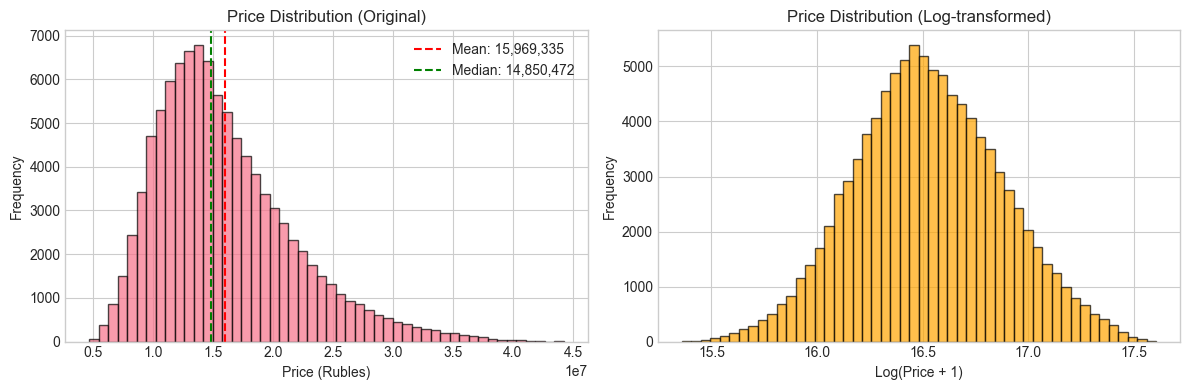

Price Statistics:
  Min:          4,680,680 rubles
  Max:         44,233,822 rubles
  Mean:        15,969,335 rubles
  Median:      14,850,472 rubles
  Skewness: 1.02


In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Original distribution
axes[0].hist(df['price'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Price (Rubles)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution (Original)')
axes[0].axvline(df['price'].mean(), color='red', linestyle='--', label=f'Mean: {df["price"].mean():,.0f}')
axes[0].axvline(df['price'].median(), color='green', linestyle='--', label=f'Median: {df["price"].median():,.0f}')
axes[0].legend()

# Log-transformed distribution
axes[1].hist(np.log1p(df['price']), bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Log(Price + 1)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Price Distribution (Log-transformed)')

plt.tight_layout()
plt.show()

print(f"Price Statistics:")
print(f"  Min:    {df['price'].min():>15,.0f} rubles")
print(f"  Max:    {df['price'].max():>15,.0f} rubles")
print(f"  Mean:   {df['price'].mean():>15,.0f} rubles")
print(f"  Median: {df['price'].median():>15,.0f} rubles")
print(f"  Skewness: {df['price'].skew():.2f}")

The price distribution is right-skewed, with more expensive properties pulling the mean above the median.

## 1.4 Numerical Feature Distributions

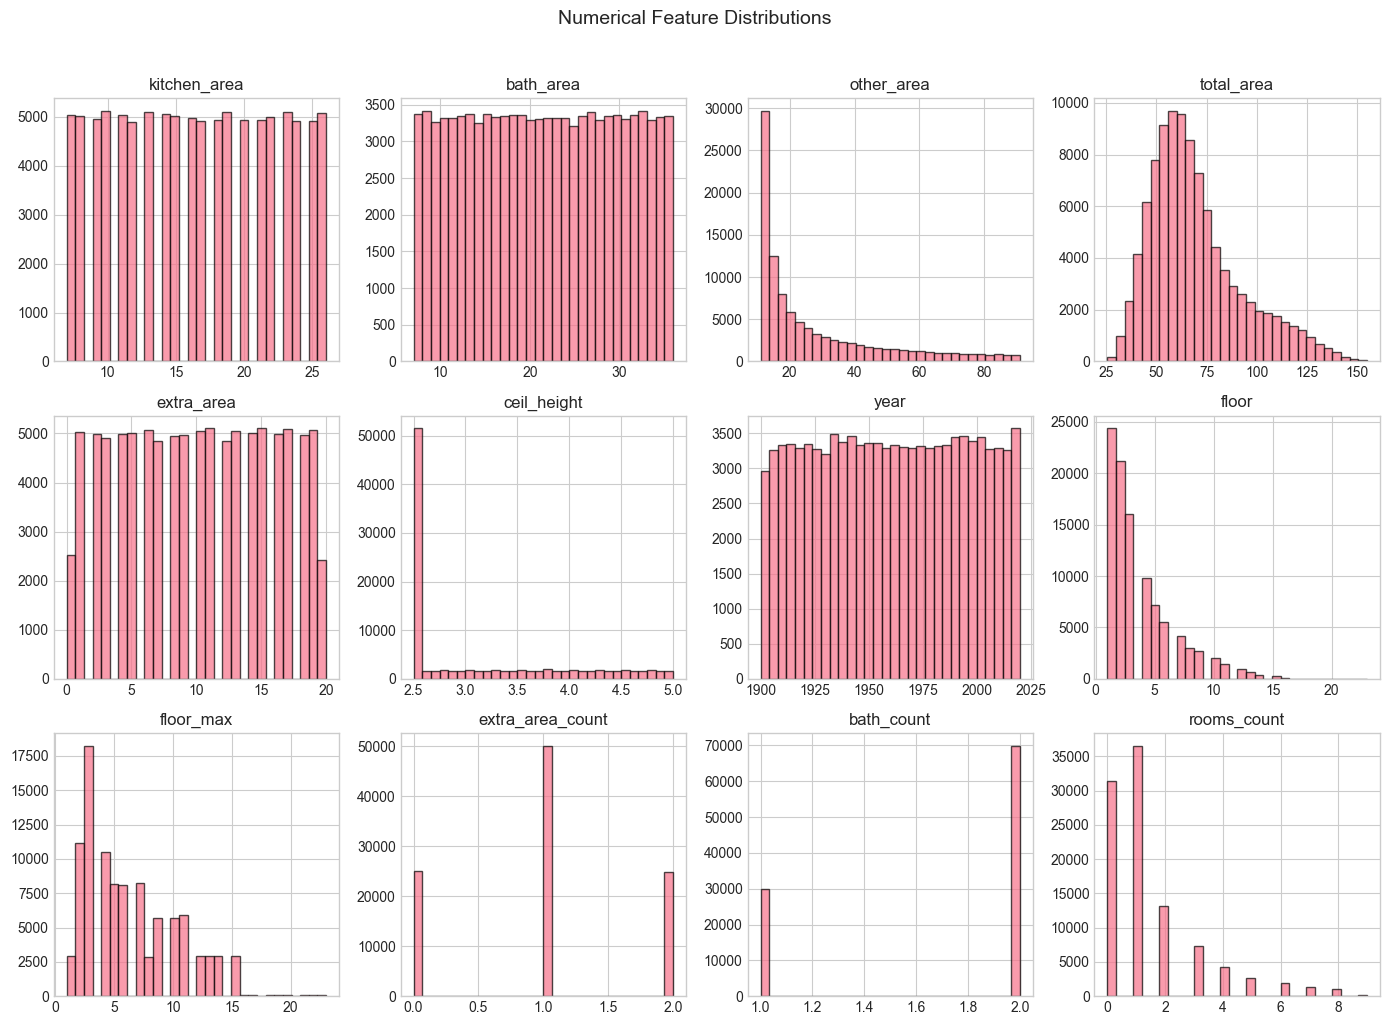

In [6]:
# Numerical features (excluding index and price)
numerical_cols = ['kitchen_area', 'bath_area', 'other_area', 'total_area', 
                  'extra_area', 'ceil_height', 'year', 'floor', 'floor_max',
                  'extra_area_count', 'bath_count', 'rooms_count']

fig, axes = plt.subplots(3, 4, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_xlabel('')

plt.suptitle('Numerical Feature Distributions', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## 1.5 Correlation Analysis

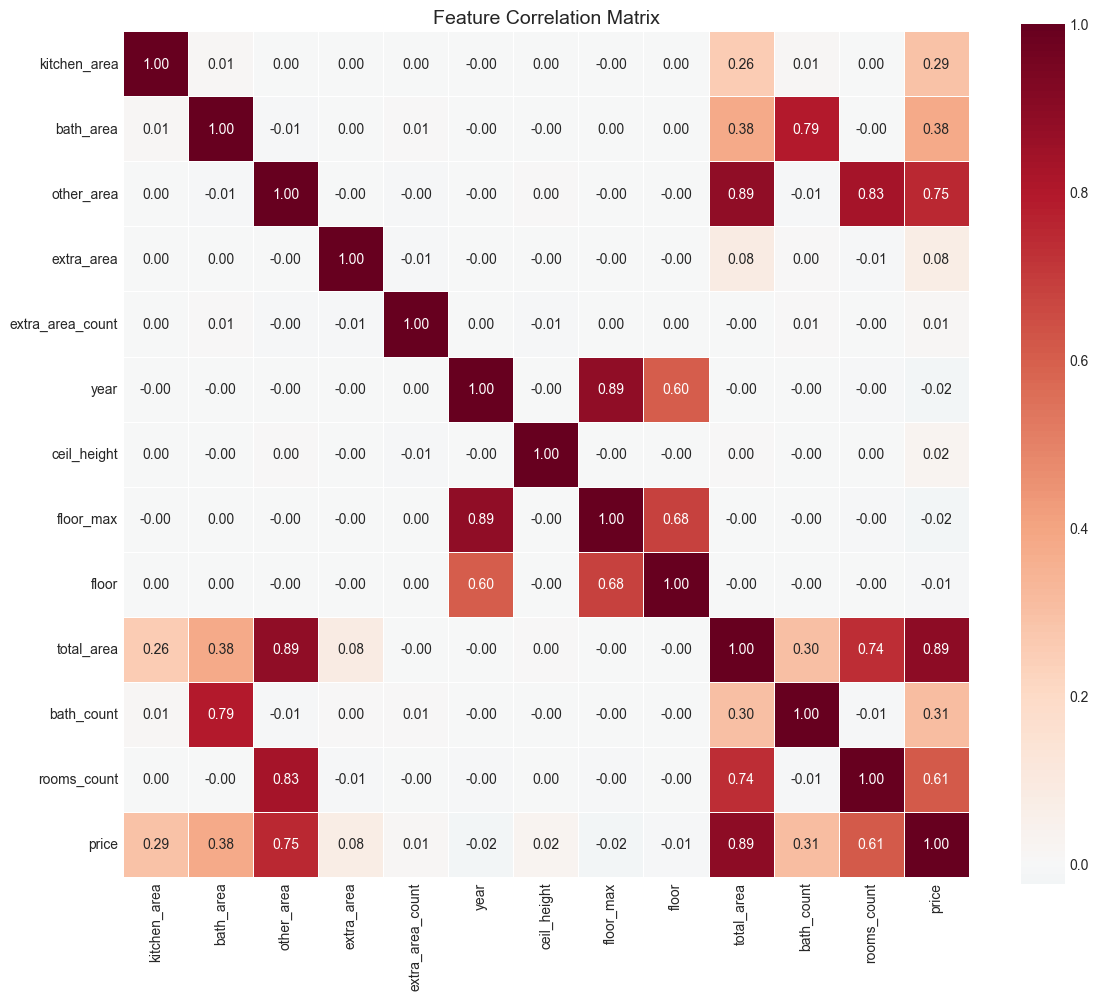

In [7]:
# Select numerical columns for correlation
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('index')  # Remove index column

correlation_matrix = df[num_cols].corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()

In [8]:
# Correlations with price (sorted)
print("CORRELATIONS WITH PRICE")
print("=" * 40)
price_corr = correlation_matrix['price'].drop('price').sort_values(ascending=False)
for feature, corr in price_corr.items():
    print(f"  {feature:20s}: {corr:>7.3f}")

CORRELATIONS WITH PRICE
  total_area          :   0.889
  other_area          :   0.752
  rooms_count         :   0.610
  bath_area           :   0.377
  bath_count          :   0.310
  kitchen_area        :   0.288
  extra_area          :   0.077
  ceil_height         :   0.024
  extra_area_count    :   0.011
  floor               :  -0.008
  floor_max           :  -0.024
  year                :  -0.024


`total_area` has the strongest correlation with price (0.889). Area-related features are also correlated with each other.

## 1.6 Categorical Features

In [9]:
# Categorical columns
cat_cols = ['district_name', 'extra_area_type_name', 'gas', 'hot_water', 'central_heating']

print("CATEGORICAL FEATURE SUMMARY")
print("=" * 50)
for col in cat_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

CATEGORICAL FEATURE SUMMARY

district_name:
district_name
Moskovskij       14559
Petrogradskij    14391
Vyborgskij       14310
Nevskij          14301
Centralnyj       14269
Krasnoselskij    14149
Kirovskij        14021
Name: count, dtype: int64

extra_area_type_name:
extra_area_type_name
balcony    50118
loggia     49882
Name: count, dtype: int64

gas:
gas
Yes    50040
No     49960
Name: count, dtype: int64

hot_water:
hot_water
Yes    65011
No     34989
Name: count, dtype: int64

central_heating:
central_heating
Yes    90040
No      9960
Name: count, dtype: int64


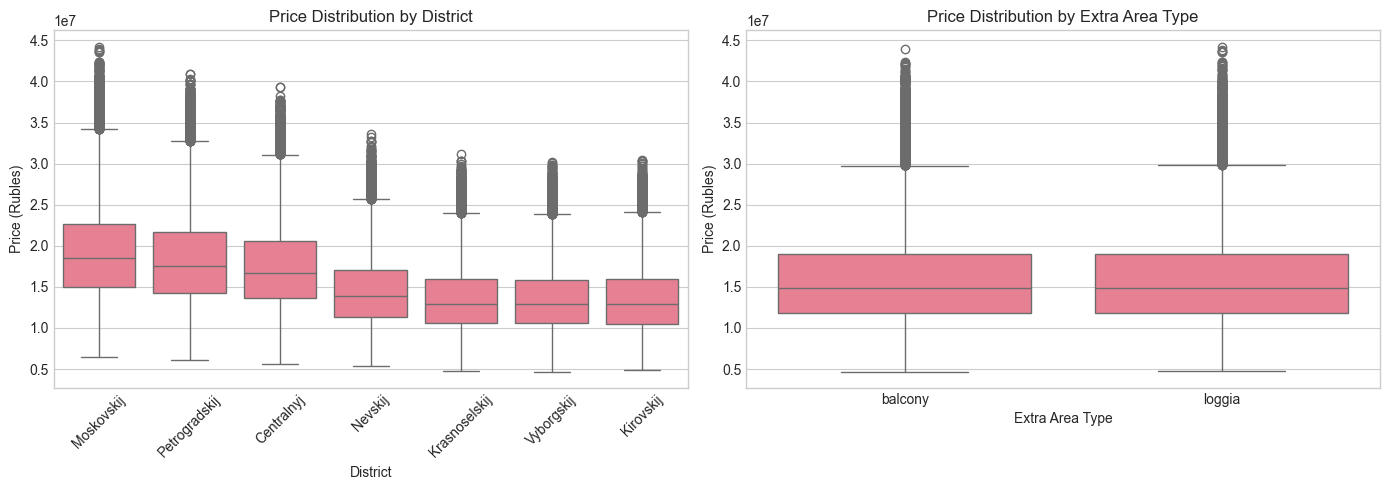

In [10]:
# Price by district
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# District boxplot
district_order = df.groupby('district_name')['price'].median().sort_values(ascending=False).index
sns.boxplot(data=df, x='district_name', y='price', order=district_order, ax=axes[0])
axes[0].set_title('Price Distribution by District')
axes[0].set_xlabel('District')
axes[0].set_ylabel('Price (Rubles)')
axes[0].tick_params(axis='x', rotation=45)

# Extra area type boxplot
sns.boxplot(data=df, x='extra_area_type_name', y='price', ax=axes[1])
axes[1].set_title('Price Distribution by Extra Area Type')
axes[1].set_xlabel('Extra Area Type')
axes[1].set_ylabel('Price (Rubles)')

plt.tight_layout()
plt.show()

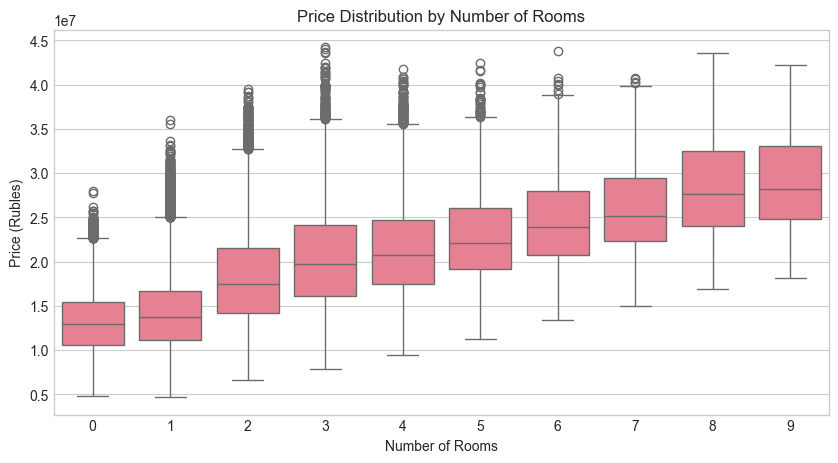

In [11]:
# Price by rooms count
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='rooms_count', y='price')
plt.title('Price Distribution by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price (Rubles)')
plt.show()

## 1.7 Total Area vs Price

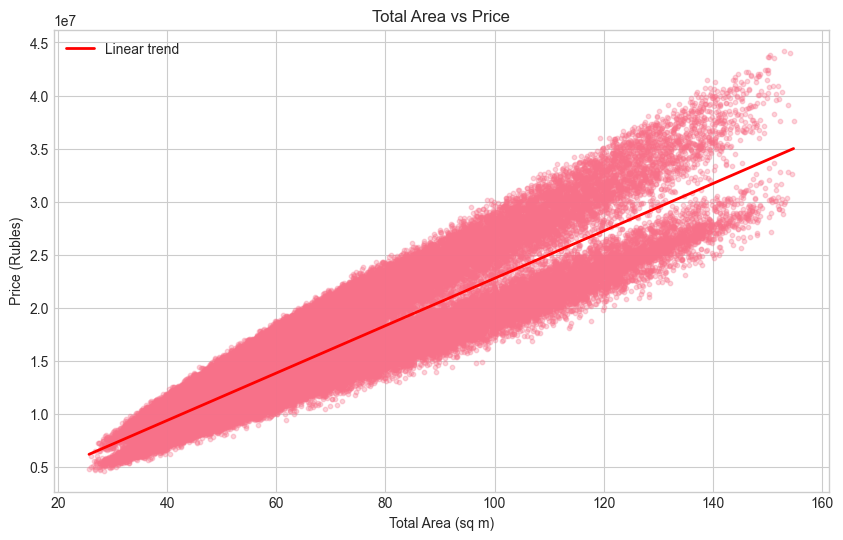

In [12]:
# Scatter plot: total_area vs price
plt.figure(figsize=(10, 6))
plt.scatter(df['total_area'], df['price'], alpha=0.3, s=10)
plt.xlabel('Total Area (sq m)')
plt.ylabel('Price (Rubles)')
plt.title('Total Area vs Price')

# Add trend line
z = np.polyfit(df['total_area'], df['price'], 1)
p = np.poly1d(z)
x_line = np.linspace(df['total_area'].min(), df['total_area'].max(), 100)
plt.plot(x_line, p(x_line), 'r-', linewidth=2, label='Linear trend')
plt.legend()
plt.show()

## 1.8 Summary

- No missing values in the dataset
- Price is right-skewed
- `total_area` has the strongest correlation with price
- Boolean features need to be encoded (Yes/No to 1/0)
- Categorical features: district_name, extra_area_type_name